## Import libraries

In [33]:
%config Completer.use_jedi = False #to use autocomplete feature in jupyter
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

## Import dataset

In [34]:
df = pd.read_csv('comma-separated-values-file-1.csv')

## Feature Engineering

In [35]:
df.head()

,Date,Month,Season,ADG_INT,GBD_5min,GrazeMinutes,GrazeHrs_5min,MeanTA,MoonitorID,Pasture,...,Deployment,RFID,Rest,Walk,Graze,Total,%Graze,%Rest,GrazeHrs_4sec,Eartag
0,9/6/2019,9,2,1,130.596667,652.983333,10.883056,49.294584,22,19N,...,1,0-2338641,11428,668,9513,21609,44.0,52.9,10.6,242
1,9/6/2019,9,2,1,93.494444,570.966667,9.516111,47.804113,23,19N,...,1,0-2310363,11949,386,9287,21622,43.0,55.3,10.3,1037
2,9/6/2019,9,2,1,70.331481,637.983333,10.633056,36.272856,8,22W,...,1,0-2309508,10898,908,9805,21611,45.4,50.4,10.9,781
3,9/6/2019,9,2,1,106.596667,542.983333,9.031012,30.301612,9,22W,...,1,0-3213490,12128,1097,8400,21625,38.8,56.1,9.3,664
4,9/6/2019,9,2,1,125.241667,505.966667,8.432778,26.086886,11,22W,...,1,0-3213439,13016,771,7817,21604,36.2,60.2,8.7,796


In [36]:
df.drop(['Date', 'Season', 'MoonitorID', 'Pasture', 'Year', 'Week', 'Deployment', 'RFID', 'Eartag'], axis=1, inplace=True)

In [37]:
df.head()

,Month,ADG_INT,GBD_5min,GrazeMinutes,GrazeHrs_5min,MeanTA,Rest,Walk,Graze,Total,%Graze,%Rest,GrazeHrs_4sec
0,9,1,130.596667,652.983333,10.883056,49.294584,11428,668,9513,21609,44.0,52.9,10.6
1,9,1,93.494444,570.966667,9.516111,47.804113,11949,386,9287,21622,43.0,55.3,10.3
2,9,1,70.331481,637.983333,10.633056,36.272856,10898,908,9805,21611,45.4,50.4,10.9
3,9,1,106.596667,542.983333,9.031012,30.301612,12128,1097,8400,21625,38.8,56.1,9.3
4,9,1,125.241667,505.966667,8.432778,26.086886,13016,771,7817,21604,36.2,60.2,8.7


In [38]:
df.ADG_INT.value_counts()

2    216
1    158
5    136
4    134
Name: ADG_INT, dtype: int64

## Feature Selection

I will pick the predictors that are related to the target variable. Instead of doing it randomly, I will fit a model and find the best set of predictors 

In [39]:
X = df.drop(['ADG_INT'], axis = 1)
y = df.ADG_INT
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 


[0.43549918 0.05105929 0.04852806 0.04419499 0.05012265 0.06684202
 0.08253758 0.04178855 0.03571094 0.04380869 0.0630332  0.03687484]


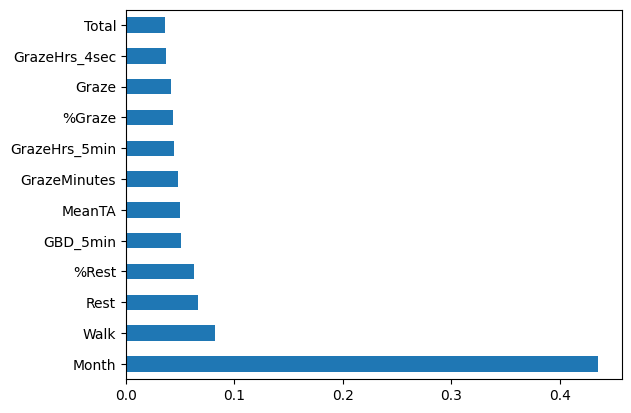

In [40]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

## Data Visualization

In [41]:
df.head()

,Month,ADG_INT,GBD_5min,GrazeMinutes,GrazeHrs_5min,MeanTA,Rest,Walk,Graze,Total,%Graze,%Rest,GrazeHrs_4sec
0,9,1,130.596667,652.983333,10.883056,49.294584,11428,668,9513,21609,44.0,52.9,10.6
1,9,1,93.494444,570.966667,9.516111,47.804113,11949,386,9287,21622,43.0,55.3,10.3
2,9,1,70.331481,637.983333,10.633056,36.272856,10898,908,9805,21611,45.4,50.4,10.9
3,9,1,106.596667,542.983333,9.031012,30.301612,12128,1097,8400,21625,38.8,56.1,9.3
4,9,1,125.241667,505.966667,8.432778,26.086886,13016,771,7817,21604,36.2,60.2,8.7


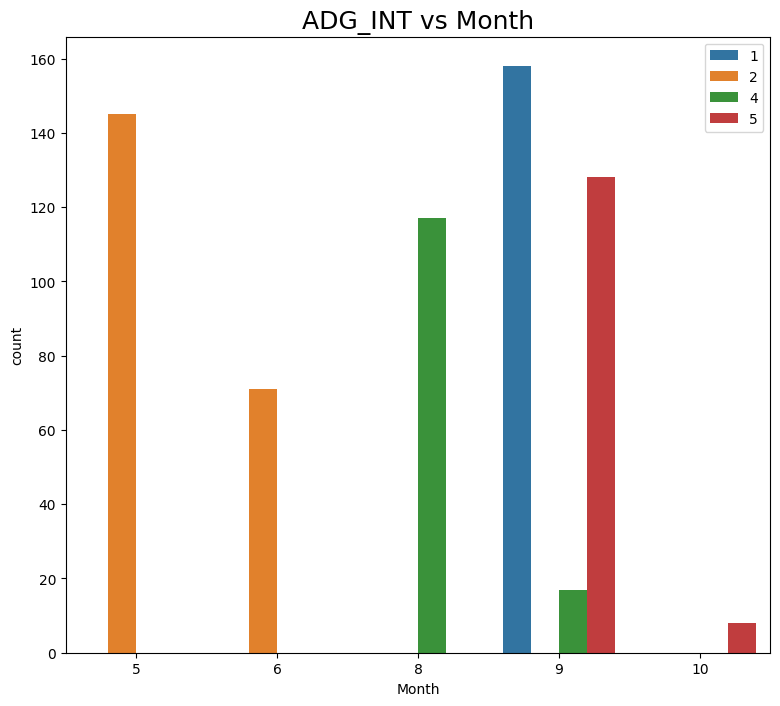

In [42]:

fig1 = plt.figure(figsize=(20,5))
ax1=fig1.add_subplot(121)
sns.countplot(data=df, hue='ADG_INT', x='Month')
plt.title('ADG_INT vs Month', fontsize = 18)
ax1.legend(loc=1)

It can be seen that on the month of Aug, Sep and Oct there is increase in weight of Cattle.

C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2551979184.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['ADG_INT'] == 1, 'Walk'], label='1', shade = True)
C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2551979184.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['ADG_INT'] == 2, 'Walk'], label='2', shade = True)
C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2551979184.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['ADG_INT'] == 4, 'Walk'], label='4', shade = True)
C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2551979184.py:8: FutureWarning: 

`shade` is now depreca

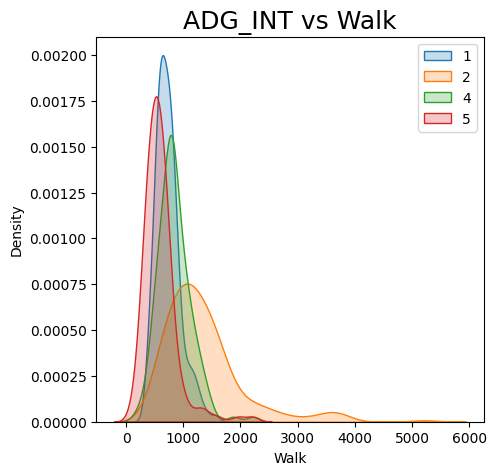

In [43]:
f= plt.figure(figsize=(5,5))

ax1=f.add_subplot()

sns.kdeplot(df.loc[df['ADG_INT'] == 1, 'Walk'], label='1', shade = True)
sns.kdeplot(df.loc[df['ADG_INT'] == 2, 'Walk'], label='2', shade = True)
sns.kdeplot(df.loc[df['ADG_INT'] == 4, 'Walk'], label='4', shade = True)
sns.kdeplot(df.loc[df['ADG_INT'] == 5, 'Walk'], label='5', shade = True)
plt.title('ADG_INT vs Walk', fontsize = 18)
ax1.legend(loc = 1)

We can see that the graph for weight 5kg is slightly towards left side indicating that less steps can lead to more weight gain of the cattle. Similarly, more steps can lead to less weight gain // normalize y  specify masures

C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2258964785.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['ADG_INT'] == 1, '%Rest'], label='1', shade = True)
C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2258964785.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['ADG_INT'] == 2, '%Rest'], label='2', shade = True)
C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2258964785.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['ADG_INT'] == 4, '%Rest'], label='4', shade = True)
C:\Users\lenova\AppData\Local\Temp\ipykernel_5560\2258964785.py:8: FutureWarning: 

`shade` is now depr

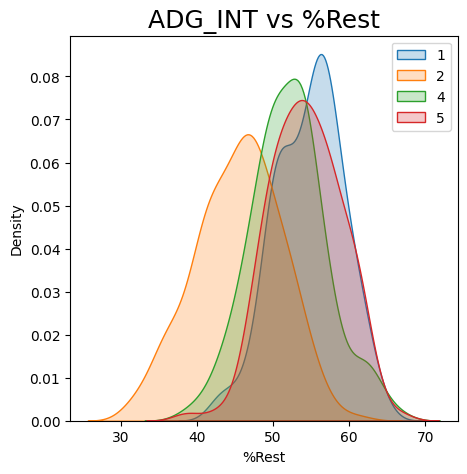

In [44]:
f= plt.figure(figsize=(5,5))

ax1=f.add_subplot()

sns.kdeplot(df.loc[df['ADG_INT'] == 1, '%Rest'], label='1', shade = True)
sns.kdeplot(df.loc[df['ADG_INT'] == 2, '%Rest'], label='2', shade = True)
sns.kdeplot(df.loc[df['ADG_INT'] == 4, '%Rest'], label='4', shade = True)
sns.kdeplot(df.loc[df['ADG_INT'] == 5, '%Rest'], label='5', shade = True)
plt.title('ADG_INT vs %Rest', fontsize = 18)
ax1.legend(loc = 1)

Most cattle who has rested less tend to gain weight around 2kgs, whereas those who have more rest percentage tends to gain weight around 5kgs.

## Modelling

In [45]:
X = df[['%Rest', 'Walk', 'Month']]
y = df['ADG_INT'].astype(str)

After creating the X and y variable, we split it into train and test sets

In [46]:
xtrain, xtest, ytrain, ytest = tts(X, y, test_size=0.35, random_state=0)

## Feature Scaling

In [47]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

### Logistic Regression Classifier 

Fit and predict a logistic regression model

In [48]:
list_accuracies = []

classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Logistic Regression model

In [49]:
cm = confusion_matrix(ytest, ypred)
print(cm)
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

[[43  0  0  6]
 [ 0 78  0  0]
 [ 7  0 43  1]
 [24  0  0 24]]


0.831858407079646

The accuracy is 0.83

### K-nearest neighbour Classifier 

Fit and predict a KNN model

In [50]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the K-nearest neighbour model

[[37  0  0 12]
 [ 0 78  0  0]
 [ 8  0 43  0]
 [26  0  2 20]]


0.7876106194690266

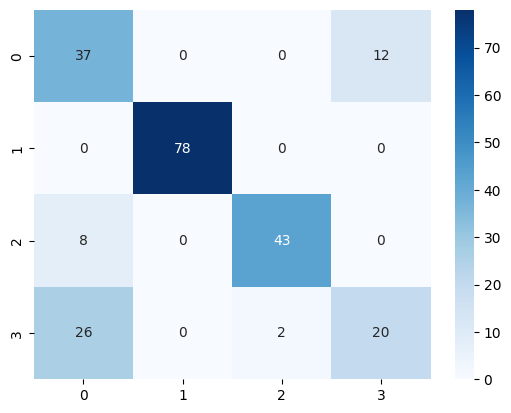

In [51]:
cm = confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

The accuracy is 0.78

### SVC Classifier 

In [52]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the SVC model

[[45  0  0  4]
 [ 0 78  0  0]
 [ 8  0 43  0]
 [23  0  0 25]]


0.8451327433628318

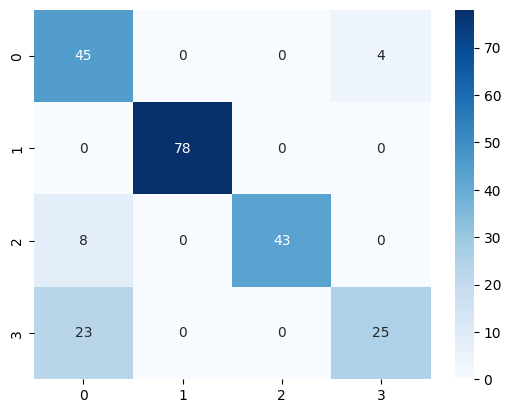

In [53]:
cm = confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

The accuracy is 0.84

### Gaussian NB Classifier 

Fit and predict a Gaussian NB model

In [54]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Gaussian NB model

[[49  0  0  0]
 [ 0 78  0  0]
 [ 8  0 43  0]
 [41  0  7  0]]


0.7522123893805309

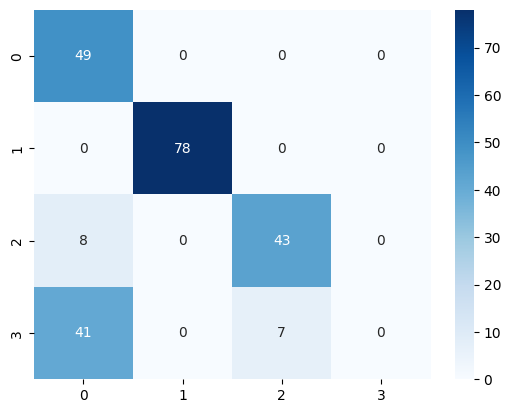

In [55]:
cm = confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

The accuracy is 0.75

### Decision Tree Classifier 

Fit and predict a Decision Tree Classifier model

In [56]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Decision Tree Classifier  model

[[30  0  1 18]
 [ 0 78  0  0]
 [ 6  0 43  2]
 [20  0  3 25]]


0.7787610619469026

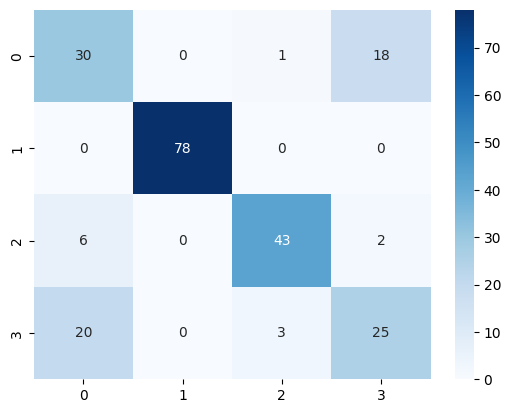

In [57]:
cm = confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

The accuracy is 0.77

### Randomn Forest Classifier

Fit and predict a Randomn Forest Classifier model

In [58]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

Finding the accuracy_score and confusion matrix for the Randomn Forest Classifier model

[[38  0  1 10]
 [ 0 78  0  0]
 [ 6  0 43  2]
 [22  0  2 24]]


0.8097345132743363

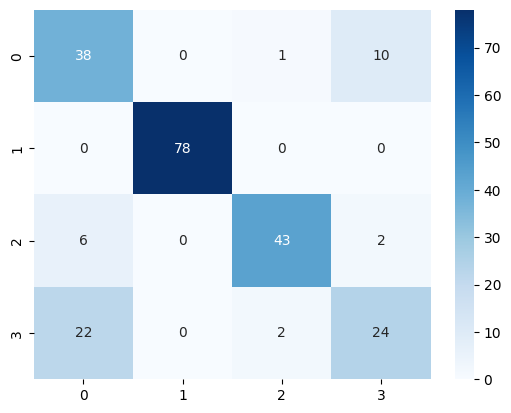

In [59]:
cm = confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues')
acc_score = accuracy_score(ytest, ypred)
list_accuracies.append(acc_score)
acc_score

The accuracy is 0.80

In [60]:
print(list_accuracies)
names = ['Logistic Regression', 'KNN', 'SVC', 'Gaussian NB', 'DT', 'RF']

accuracy_df = pd.DataFrame({'Name': names, 'Score': list_accuracies})
print(accuracy_df)

[0.831858407079646, 0.7876106194690266, 0.8451327433628318, 0.7522123893805309, 0.7787610619469026, 0.8097345132743363]
                  Name     Score
0  Logistic Regression  0.831858
1                  KNN  0.787611
2                  SVC  0.845133
3          Gaussian NB  0.752212
4                   DT  0.778761
5                   RF  0.809735


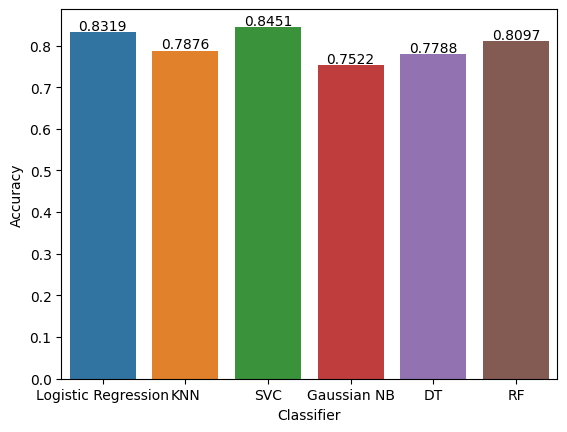

In [61]:
axis = sns.barplot(x = 'Name', y = 'Score', data = accuracy_df )
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Support Vector Classifier has the best accuracy amongst all the other classifiers. // justify

## Prediction on new data

I will predict rating of the product using new values of rest percentage, walk and month.

In [62]:
classifier = SVC()
classifier.fit(xtrain, ytrain)

SVC()

In [63]:
print(classifier.predict(sc.transform([[10,500,8]])))

['2']


C:\Users\lenova\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
